# ***Time Series Analysis For Bitcoin Price Prediction using Prophet***






## Importing Libraries

1.   Pandas
2.   Matplotlib
3.   Warning
4.   Yfinance
5.   Prophet












In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
from prophet import Prophet

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Collection

In [ ]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800
2014-09-18,456.860,456.860,413.104,424.440,424.440,34483200
2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700
2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600
2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100
...,...,...,...,...,...,...
2023-11-16,37879.980,37934.625,35545.473,36154.770,36154.770,26007385366
2023-11-17,36164.824,36704.484,35901.234,36596.684,36596.684,22445028430
2023-11-18,36625.371,36839.281,36233.312,36585.703,36585.703,11886022717


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800
1,2014-09-18,456.860,456.860,413.104,424.440,424.440,34483200
2,2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700
3,2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600
4,2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100
...,...,...,...,...,...,...,...
3347,2023-11-16,37879.980,37934.625,35545.473,36154.770,36154.770,26007385366
3348,2023-11-17,36164.824,36704.484,35901.234,36596.684,36596.684,22445028430
3349,2023-11-18,36625.371,36839.281,36233.312,36585.703,36585.703,11886022717
3350,2023-11-19,36585.766,37509.355,36414.598,37386.547,37386.547,12915986553


## Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3352 non-null   datetime64[ns]
 1   Open       3352 non-null   float64       
 2   High       3352 non-null   float64       
 3   Low        3352 non-null   float64       
 4   Close      3352 non-null   float64       
 5   Adj Close  3352 non-null   float64       
 6   Volume     3352 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 183.4 KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3352.000,3352.000,3352.000,3352.000,3352.000,3352.000
mean,14246.647,14582.583,13883.226,14256.217,14256.217,16477677791.120
std,16011.678,16401.192,15572.168,16011.688,16011.688,19175639558.350
min,176.897,211.731,171.510,178.103,178.103,5914570.000
25%,896.566,910.067,864.114,898.162,898.162,147097496.000
50%,8160.603,8288.145,7928.415,8164.351,8164.351,10948572258.000
75%,23087.212,23468.427,22696.540,23122.885,23122.885,26958124997.750
max,67549.734,68789.625,66382.062,67566.828,67566.828,350967941479.000


In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864,468.174,452.422,457.334,457.334,21056800
1,2014-09-18,456.860,456.860,413.104,424.440,424.440,34483200
2,2014-09-19,424.103,427.835,384.532,394.796,394.796,37919700
3,2014-09-20,394.673,423.296,389.883,408.904,408.904,36863600
4,2014-09-21,408.085,412.426,393.181,398.821,398.821,26580100


In [ ]:
df = df[['Date','Adj Close']]
df

,Date,Adj Close
0,2014-09-17,457.334
1,2014-09-18,424.440
2,2014-09-19,394.796
3,2014-09-20,408.904
4,2014-09-21,398.821
...,...,...
3347,2023-11-16,36154.770
3348,2023-11-17,36596.684
3349,2023-11-18,36585.703
3350,2023-11-19,37386.547


## change columns to ds and y

In [ ]:
df.columns = ['ds','y']

In [ ]:
df

,ds,y
0,2014-09-17,457.334
1,2014-09-18,424.440
2,2014-09-19,394.796
3,2014-09-20,408.904
4,2014-09-21,398.821
...,...,...
3347,2023-11-16,36154.770
3348,2023-11-17,36596.684
3349,2023-11-18,36585.703
3350,2023-11-19,37386.547


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3352 non-null   datetime64[ns]
 1   y       3352 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.5 KB


## Model Building and Training

In [ ]:
model = Prophet(daily_seasonality=True)

In [ ]:
model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9jyunqm/jaadx61n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk9jyunqm/hdm_ciqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1822', 'data', 'file=/tmp/tmpk9jyunqm/jaadx61n.json', 'init=/tmp/tmpk9jyunqm/hdm_ciqz.json', 'output', 'file=/tmp/tmpk9jyunqm/prophet_modelpqjinfbi/prophet_model-20231120054509.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:45:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:45:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
3347,2023-11-16,36154.770
3348,2023-11-17,36596.684
3349,2023-11-18,36585.703
3350,2023-11-19,37386.547
3351,2023-11-20,37084.953


## Creating Future 3 years Dataframe

In [ ]:
future_dates = model.make_future_dataframe(periods=1095,freq='D')

In [ ]:
future_dates.tail()

,ds
4442,2026-11-15
4443,2026-11-16
4444,2026-11-17
4445,2026-11-18
4446,2026-11-19


In [ ]:
prediction = model.predict(future_dates)

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4442,2026-11-15,-6521.450,-59665.592,44735.230,-58603.477,44797.002,556.172,556.172,556.172,-503.919,...,6.820,6.820,6.820,1053.271,1053.271,1053.271,0.000,0.000,0.000,-5965.278
4443,2026-11-16,-6546.812,-60921.994,45483.598,-58659.735,44866.243,453.109,453.109,453.109,-503.919,...,19.179,19.179,19.179,937.849,937.849,937.849,0.000,0.000,0.000,-6093.703
4444,2026-11-17,-6572.174,-60560.892,45851.953,-58713.552,44935.483,303.537,303.537,303.537,-503.919,...,-12.423,-12.423,-12.423,819.879,819.879,819.879,0.000,0.000,0.000,-6268.637
4445,2026-11-18,-6597.536,-59298.063,44511.408,-58766.347,45004.724,218.960,218.960,218.960,-503.919,...,22.486,22.486,22.486,700.392,700.392,700.392,0.000,0.000,0.000,-6378.575
4446,2026-11-19,-6622.897,-60840.269,44253.096,-58819.330,45073.964,47.778,47.778,47.778,-503.919,...,-28.666,-28.666,-28.666,580.363,580.363,580.363,0.000,0.000,0.000,-6575.119


In [ ]:
prediction[['ds','yhat']].tail()

,ds,yhat
4442,2026-11-15,-5965.278
4443,2026-11-16,-6093.703
4444,2026-11-17,-6268.637
4445,2026-11-18,-6378.575
4446,2026-11-19,-6575.119


In [ ]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4447 entries, 0 to 4446
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          4447 non-null   datetime64[ns]
 1   trend                       4447 non-null   float64       
 2   yhat_lower                  4447 non-null   float64       
 3   yhat_upper                  4447 non-null   float64       
 4   trend_lower                 4447 non-null   float64       
 5   trend_upper                 4447 non-null   float64       
 6   additive_terms              4447 non-null   float64       
 7   additive_terms_lower        4447 non-null   float64       
 8   additive_terms_upper        4447 non-null   float64       
 9   daily                       4447 non-null   float64       
 10  daily_lower                 4447 non-null   float64       
 11  daily_upper                 4447 non-null   float64     

## Visualizations

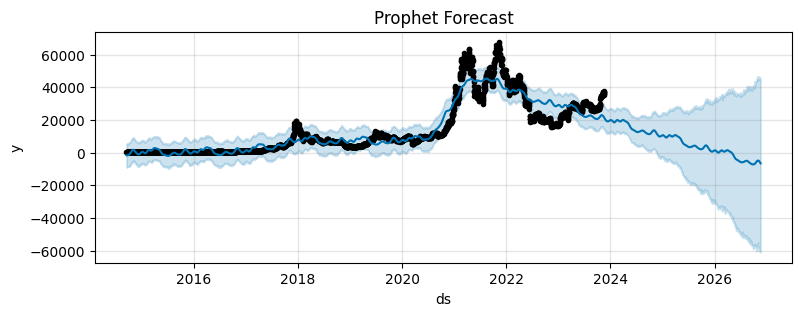

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))
fig = model.plot(prediction, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

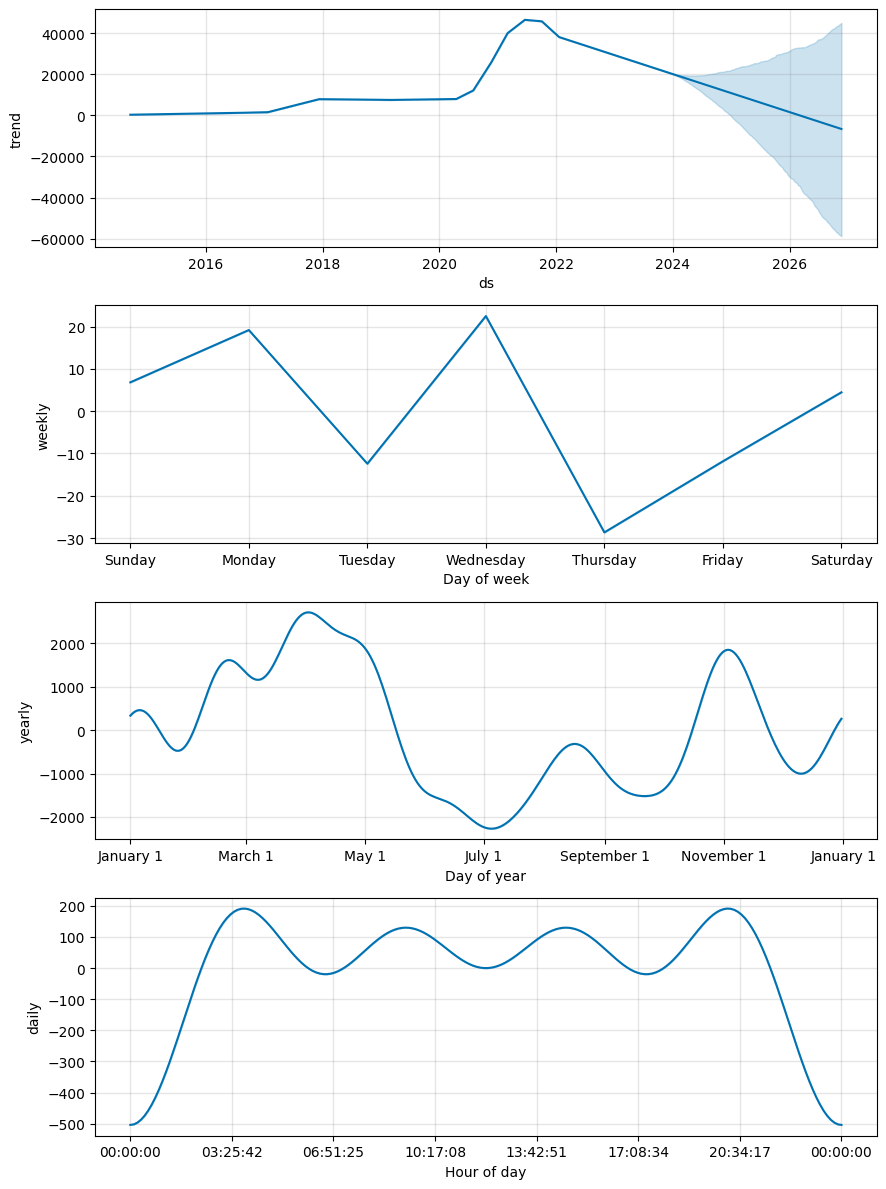

In [ ]:
fig2 = model.plot_components(prediction)
plt.show()

## Predictions

In [ ]:
print('The Price of Bitcoin is:')
print(prediction[prediction.ds == '2022-01-01']['yhat'])

The Price of Bitcoin is:
2663   39198.679
Name: yhat, dtype: float64


In [ ]:
val1 = prediction.loc[prediction['ds'] == '2023-01-01', 'yhat'].values[0]
print('The Price of Bitcoin on 2023-01-01 is:',val1,'$')

The Price of Bitcoin on 2023-01-01 is: 29148.02880321983 $


In [ ]:
val2 = prediction.loc[prediction['ds'] == '2024-01-01', 'yhat'].values[0]
print('The Price of Bitcoin on 2024-01-01 is:',val2,'$')

The Price of Bitcoin on 2024-01-01 is: 19889.09650850651 $


## Saving the Model

In [ ]:
import pickle
pickle.dump(model,open('prophet.pkl','wb'))